## Tip calculation using Mamdani FIS

A classic and understandable issue is designing a system that provides an appropriate tip percentage</br>
based on the quality of the food and the quality of the service.

#### Import libs

In [22]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

#### Define Antecedents and Consequent 

In [23]:
quality = ctrl.Antecedent(np.arange(0, 11, 1), 'quality')
service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')

tip = ctrl.Consequent(np.arange(0, 31, 1), 'tip')

#### Define MFs

In [24]:
quality.automf(names=['poor', 'average', 'good'])
service.automf(names=['poor', 'average', 'good'])

tip['low'] = fuzz.trimf(tip.universe, [0, 0, 13])
tip['medium'] = fuzz.trimf(tip.universe, [0, 13, 25])
tip['high'] = fuzz.trimf(tip.universe, [13, 25, 30])

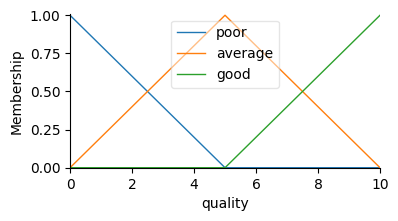

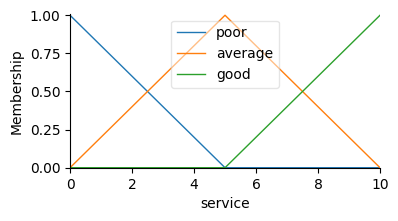

In [34]:
plt.rcParams['figure.figsize'] = [4, 2]

quality.view()
service.view()

#### Define Rules

In [38]:
rule1 = ctrl.Rule(quality['poor'] | service['poor'], tip['low'])
rule2 = ctrl.Rule(service['average'], tip['medium'])
rule3 = ctrl.Rule(service['good'] | quality['good'], tip['high'])

#### Control System

In [40]:
tipping_control_system = ctrl.ControlSystem([rule1, rule2, rule3])
tipping_simulation = ctrl.ControlSystemSimulation(tipping_control_system)

#### Result 

In [46]:
tipping_simulation.input['quality'] = 6.5
tipping_simulation.input['service'] = 9.8

tipping_simulation.compute()
print(f"Suggested tip: {tipping_simulation.output['tip']:.2f}%")

Suggested tip: 21.74%


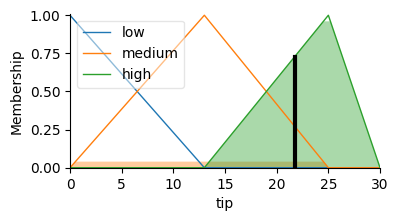

In [44]:
tip.view(sim=tipping_simulation)
plt.show()